# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the training dataset to understand the data better, visualize relationships between features, and identify any patterns or anomalies.

In [12]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
base_dir = Path(os.getcwd()).parents[0]
file_path = base_dir /'src'/'models'/'timeseriesxgboost'/ 'output' / 'aks01_pod_metrics_processed.json'
# Load the JSON file into a DataFrame
print(f"Loading data from {file_path}")
df = pd.read_json(file_path,  lines=True)

Loading data from c:\Brijesh\Projects\Datascience\MLearn\KubeTuner\kubetune1.0\src\models\timeseriesxgboost\output\aks01_pod_metrics_processed.json


In [13]:
df.describe()

,timestamp,cpuRequest,cpuLimit,cpuUsage,memRequest,memLimit,memUsage,avg_cpu_5min,avg_mem_5min,max_cpu,max_mem,hour,dayofweek,cpu_utilization_ratio,mem_utilization_ratio,cat_deployment,cat_namespace,cat_controllerName,cat_controllerKind
count,4980,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2025-06-13 00:06:19.483690496,0.192944,0.501467,0.028469,572.862731,1323.137462,241.668325,0.028473,241.669263,0.085005,834.034962,11.236747,3.514458,0.066997,0.208685,153.558635,153.558635,207.954418,2.450602
min,2025-06-12 10:58:52.764000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030000,0.000000,2.580000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-06-12 11:24:57.767000064,0.010000,0.100000,0.000300,47.680000,128.000000,18.675000,0.004200,55.160000,0.013000,131.730000,8.000000,3.000000,0.000000,0.020000,94.000000,94.000000,139.750000,1.000000
50%,2025-06-13 08:20:30.947000064,0.050000,0.200000,0.003550,128.000000,256.000000,64.140000,0.011500,101.425000,0.026000,197.850000,11.000000,4.000000,0.003300,0.110000,173.000000,173.000000,230.000000,3.000000
75%,2025-06-13 13:32:43.862000128,0.100000,0.500000,0.016800,400.000000,1024.000000,147.040000,0.023400,173.905000,0.083500,432.862500,13.000000,4.000000,0.037000,0.280000,222.000000,222.000000,305.000000,3.000000
max,2025-06-13 18:44:39.276000,4.096000,8.000000,1.007400,16384.000000,32768.000000,32766.530000,1.001400,8451.710000,1.007400,32766.530000,18.000000,4.000000,1.001000,1.190000,222.000000,222.000000,402.000000,5.000000
std,NaN,0.550616,0.981325,0.103547,1933.900232,3809.685198,1187.858738,0.065740,596.447578,0.177192,2514.638144,3.020113,0.499841,0.180760,0.250318,73.994053,73.994053,119.150225,1.096915


In [14]:
df.dtypes

timestamp                datetime64[ns]
controllerName                   object
cpuRequest                      float64
cpuLimit                        float64
cpuUsage                        float64
memRequest                      float64
memLimit                        float64
memUsage                        float64
avg_cpu_5min                    float64
avg_mem_5min                    float64
max_cpu                         float64
max_mem                         float64
hour                              int64
dayofweek                         int64
is_weekend                         bool
cpu_utilization_ratio           float64
mem_utilization_ratio           float64
cat_deployment                    int64
cat_namespace                     int64
cat_controllerName                int64
cat_controllerKind                int64
dtype: object

In [4]:
df2=df[['cpuRequest','cpuUsage','memRequest','memUsage']]

In [5]:
df2.corr()

,cpuRequest,cpuUsage,memRequest,memUsage
cpuRequest,1.000000,-0.034318,0.582694,-0.022457
cpuUsage,-0.034318,1.000000,-0.002522,0.129535
memRequest,0.582694,-0.002522,1.000000,-0.025640
memUsage,-0.022457,0.129535,-0.025640,1.000000


In [6]:
df_pod_cpu=df[['cpuRequest','cpuUsage']]

In [7]:
df_pod_cpu.corr()

,cpuRequest,cpuUsage
cpuRequest,1.000000,-0.034318
cpuUsage,-0.034318,1.000000


<Axes: >

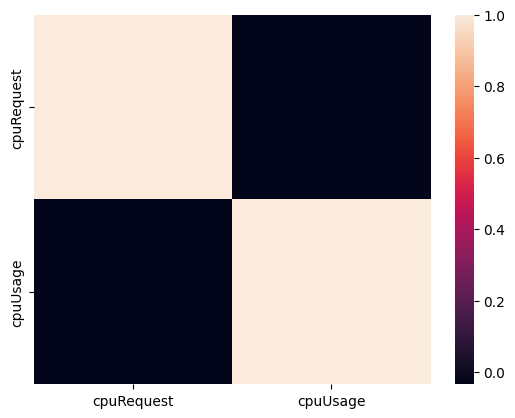

In [8]:
sns.heatmap(df_pod_cpu.corr())

In [9]:
from pycaret.regression import *
exp = setup(data=df, target='cpuUsage', session_id=123)

,Description,Value
0,Session id,123
1,Target,cpuUsage
2,Target type,Regression
3,Original data shape,"(1316, 20)"
4,Transformed data shape,"(1316, 62)"
5,Transformed train set shape,"(921, 62)"
6,Transformed test set shape,"(395, 62)"
7,Numeric features,5
8,Categorical features,14
9,Rows with missing values,38.8%


In [10]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0011,0.0002,0.0079,0.3703,0.0071,5.5699,0.1600
et,Extra Trees Regressor,0.0012,0.0002,0.0086,0.1730,0.0078,0.9944,0.2380
gbr,Gradient Boosting Regressor,0.0013,0.0002,0.0088,0.0332,0.0080,4.1142,0.2720
ada,AdaBoost Regressor,0.0016,0.0002,0.0087,0.0241,0.0079,15.5550,0.1560
dt,Decision Tree Regressor,0.0013,0.0002,0.0091,-0.2059,0.0083,1.6082,0.1120
dummy,Dummy Regressor,0.0024,0.0002,0.0090,-0.2198,0.0082,62.1042,0.1320
rf,Random Forest Regressor,0.0014,0.0002,0.0090,-0.2478,0.0082,18.5289,0.2770
huber,Huber Regressor,0.0023,0.0002,0.0095,-2.6303,0.0087,90.8618,0.1150
lasso,Lasso Regression,0.0024,0.0002,0.0095,-2.6482,0.0087,84.1914,0.1500
llar,Lasso Least Angle Regression,0.0024,0.0002,0.0095,-2.6482,0.0087,84.1914,0.1530


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [13]:
predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0657,1.5904,1.2611,0.5790,0.0517,0.0420
